## Init

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svd import ApproxSVD
from scipy.sparse.linalg import svds
import tests

In [2]:
np.random.seed(42)
random_matrix = np.random.rand(4, 12)

print(random_matrix)

[[0.3745 0.9507 0.732  0.5987 0.156  0.156  0.0581 0.8662 0.6011 0.7081 0.0206 0.9699]
 [0.8324 0.2123 0.1818 0.1834 0.3042 0.5248 0.4319 0.2912 0.6119 0.1395 0.2921 0.3664]
 [0.4561 0.7852 0.1997 0.5142 0.5924 0.0465 0.6075 0.1705 0.0651 0.9489 0.9656 0.8084]
 [0.3046 0.0977 0.6842 0.4402 0.122  0.4952 0.0344 0.9093 0.2588 0.6625 0.3117 0.5201]]


In [3]:
p = 3
u, s, vt = np.linalg.svd(random_matrix)
print(u)

[[-0.6077  0.4448 -0.3508 -0.5566]
 [-0.3444 -0.0607  0.9048 -0.2429]
 [-0.5588 -0.7862 -0.2311  0.1276]
 [-0.4471  0.4248  0.0688  0.7842]]


In [4]:
approx_svd = ApproxSVD(200, p, 'fro', True, 4, True)
traces, ubar, x_approx = approx_svd.fit(random_matrix)

# plt.plot(traces, label='Data')
# aux = u.transpose() @ random_matrix @ vt.transpose()
# true_energy = np.trace(aux[:p, :p])

# plt.axhline(y=true_energy, color='red', linestyle='dotted', linewidth=2, label='Real U trace')
# plt.ylim(bottom=min(0, traces.min()))
# plt.xlabel('Index')
# plt.ylabel('Trace')
# plt.title('Trace progression vs real U trace')
# plt.legend()
# plt.show()

DEBUG - Time: 3.358 seconds for initial scores
100%|██████████| 200/200 [00:00<00:00, 2130.71it/s]
DEBUG - Time: 3.467 seconds for total time


In [5]:
# ubar projection
print(ubar[:p, :] @ random_matrix)
print()
# true u projection
print(u[:p, :] @ random_matrix)


[[-0.1869 -0.8131 -0.8148 -0.7076 -0.2352 -0.1533 -0.0755 -0.9628 -0.26   -1.0699 -0.3948 -0.9995]
 [ 0.1592  0.3465 -0.2486  0.1411  0.4342 -0.1638  0.4952 -0.3825 -0.2481  0.4454  0.7732  0.249 ]
 [-0.9303 -0.8672 -0.5108 -0.5414 -0.4477 -0.4473 -0.5081 -0.6364 -0.7989 -0.6401 -0.4246 -0.9505]]

[[-0.1869 -0.8131 -0.8148 -0.7076 -0.2353 -0.1533 -0.0755 -0.9628 -0.26   -1.0699 -0.3948 -0.9995]
 [ 0.1592  0.3465 -0.2486  0.1411  0.4342 -0.1638  0.4952 -0.3825 -0.2481  0.4454  0.7732  0.2489]
 [-0.9303 -0.8672 -0.5108 -0.5414 -0.4477 -0.4473 -0.5081 -0.6364 -0.7989 -0.6401 -0.4246 -0.9505]]


In [7]:
tests.run_tests(score_fn = 'cf')

0.04653686208321517

0.05489813751695749

0.0008677854048801947

0.17806285724675064

0.0024677249292412995

0.026889496868243157

0.011827555938641154

0.01915973248515712

0.0017878861189277728

0.0006685592274671137



DEBUG - Time: 1.086 seconds for initial scores
100%|██████████| 10000/10000 [00:10<00:00, 910.49it/s]
DEBUG - Time: 12.080 seconds for total time


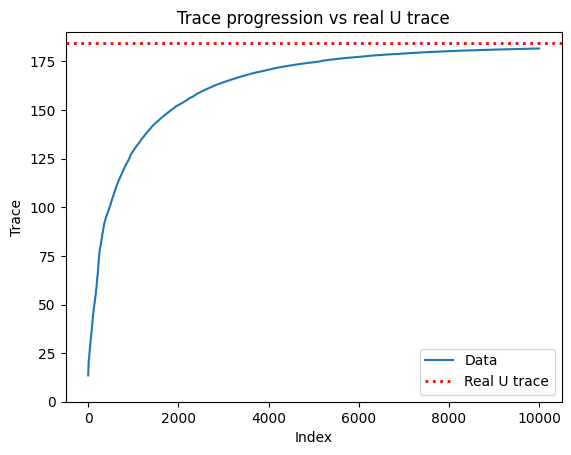

In [22]:
random_matrix = np.random.rand(50, 250)
p = 25
approx_svd = ApproxSVD(10000, p, 'cf', True)
traces, ubar, x_approx = approx_svd.fit(random_matrix)
u, s, vt = np.linalg.svd(random_matrix)
plt.plot(traces, label='Data')
aux = u.transpose() @ random_matrix @ vt.transpose()
true_energy = np.trace(aux[:p, :p])

plt.axhline(y=true_energy, color='red', linestyle='dotted', linewidth=2, label='Real U trace')
plt.ylim(bottom=min(0, traces.min()))
plt.xlabel('Index')
plt.ylabel('Trace')
plt.title('Trace progression vs real U trace')
plt.legend()
plt.show()

In [12]:
random_matrix = np.random.rand(400, 5000)
p = 200
for jobs in range(1, 17):
    if jobs % 2 == 0:
        print("JOBS:", jobs)
        approx_svd = ApproxSVD(0, p, 'fro', True, jobs)
        traces, ubar, x_approx = approx_svd.fit(random_matrix)
        print()

JOBS: 2


DEBUG - Time: 40.498 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 40.504 seconds for total time



JOBS: 4


DEBUG - Time: 25.598 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 25.604 seconds for total time



JOBS: 6


DEBUG - Time: 21.785 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 21.792 seconds for total time



JOBS: 8


DEBUG - Time: 18.700 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 18.706 seconds for total time



JOBS: 10


DEBUG - Time: 21.183 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 21.190 seconds for total time



JOBS: 12


DEBUG - Time: 18.749 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 18.755 seconds for total time



JOBS: 14


DEBUG - Time: 18.700 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 18.707 seconds for total time



JOBS: 16


DEBUG - Time: 20.556 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 20.563 seconds for total time


In [9]:
random_matrix = np.random.rand(400, 5000)
p = 200
approx_svd = ApproxSVD(500, p, 'fro', True, 8, False)
traces, ubar, x_approx = approx_svd.fit(random_matrix)

DEBUG - Time: 18.809 seconds for initial scores
100%|██████████| 500/500 [01:42<00:00,  4.89it/s]
DEBUG - Time: 121.116 seconds for total time


# Validate Ubar
Extract mean from random matrix (to center it) and then project it with Ubar to functionally perform PCA (not sure)

In [ ]:
from sklearn.decomposition import PCA
random_mean = np.mean(random_matrix, axis=1, keepdims=True)
random_centered = random_matrix - random_mean
_, ubar, _ = svd.approx_svd(random_centered, p, 200)
random_transposed = random_centered.transpose()

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(random_transposed)

print(ubar[:p, :] @ random_centered)
print()
print(u[:p, :] @ random_matrix)
print()
print(X_pca.transpose())
print(np.linalg.norm(ubar[:p, :] @ random_matrix, 'fro'))
print(np.linalg.norm(u[:p, :] @ random_matrix, 'fro'))

KeyboardInterrupt: 

: 